In [44]:
path_1fs = "4D_MBAR_estimates_C_HC_1ref_1ststabtestlower_7-30.txt"
path2_1fs = "cychex_simulated_observables_4D_param_changes_eps2p5_rmin0p5_wnonbt_7-26.txt"

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import GPy
%matplotlib notebook

In [46]:
df_1fs = pd.read_csv(path_1fs,sep=';').reset_index(drop=True)
df2_1fs = pd.read_csv(path2_1fs, sep=';').reset_index(drop=True)


In [47]:
# First thing I want to do is compare the simulations I've made to the MBAR estimates
# I'm matching based on the parameter state and there was an issue with some not matching up, so I'm rounding them all to the same decimal place first
df_1fs = df_1fs.round({'rmin_half values C':4,'epsilon values C':4,'rmin_half values H-C':4,'epsilon values H-C':4})
df2_1fs = df2_1fs.round({'rmin_half_val_C':4,'eps_val_C':4,'rmin_half_val_H-C':4,'eps_val_H-C':4})

# It's easier to do the matching on a single identifier, so I'm making a string out of the two parameters to match on   
df_1fs['state_coords'] = df_1fs['epsilon values C'].astype(str) +','+ df_1fs['rmin_half values C'].astype(str) +','+ df_1fs['epsilon values H-C'].astype(str) +','+ df_1fs['rmin_half values H-C'].astype(str)
df2_1fs['state_coords'] = df2_1fs['eps_val_C'].astype(str)+','+df2_1fs['rmin_half_val_C'].astype(str) +','+ df2_1fs['eps_val_H-C'].astype(str)+','+df2_1fs['rmin_half_val_H-C'].astype(str)



In [48]:
#df_1fs = df_1fs[df_1fs['N_eff']>=20]
print([df_1fs['state_coords'],df_1fs['N_eff']])

[0      0.082,1.8126,0.0118,1.4126
1       0.08,1.8126,0.0118,1.4126
2      0.082,1.8035,0.0118,1.4056
3      0.082,1.8217,0.0115,1.4126
4      0.082,1.8035,0.0115,1.4197
5     0.0841,1.8126,0.0115,1.4126
6      0.082,1.8035,0.0118,1.4126
7     0.0841,1.8035,0.0115,1.4056
8      0.082,1.8126,0.0118,1.4126
9       0.08,1.8217,0.0118,1.4126
10    0.0841,1.8035,0.0118,1.4056
11     0.082,1.8126,0.0115,1.4126
12      0.08,1.8035,0.0115,1.4126
13    0.0841,1.8035,0.0115,1.4197
14      0.08,1.8035,0.0118,1.4197
15     0.082,1.8035,0.0115,1.4056
16    0.0841,1.8035,0.0118,1.4126
17     0.082,1.8126,0.0118,1.4126
18    0.0841,1.8126,0.0118,1.4126
19     0.082,1.8217,0.0121,1.4056
20     0.082,1.8126,0.0118,1.4126
21      0.08,1.8126,0.0121,1.4056
22      0.08,1.8217,0.0115,1.4056
23      0.08,1.8217,0.0115,1.4126
24      0.08,1.8126,0.0118,1.4056
25     0.082,1.8126,0.0118,1.4126
26    0.0841,1.8217,0.0118,1.4126
27     0.082,1.8126,0.0121,1.4056
28    0.0841,1.8217,0.0121,1.4056
29     0.082,

In [49]:
# Only keep MBAR/simulation estimates that match in both
#dfcomp_1fs = df_1fs[df_1fs.state_coords.isin(df2_1fs.state_coords)].drop_duplicates(['state_coords']).sort_values('N_eff',ascending=False).reset_index()
dfcomp_1fs = df_1fs.drop_duplicates(['state_coords']).sort_values('N_eff',ascending=False).reset_index()
dfcomp_1fs = dfcomp_1fs.dropna()
df2_1fs = df2_1fs.dropna()
df2_1fs = df2_1fs[df2_1fs['state_coords'].isin(dfcomp_1fs['state_coords'])].drop_duplicates(['state_coords'])
dfcomp_1fs = dfcomp_1fs.set_index('state_coords')
df2_1fs = df2_1fs.set_index('state_coords')

# index cleanup
#dfcomp_1fs = dfcomp_1fs.reindex(df2_1fs.index)
df2_1fs['N_eff'] = dfcomp_1fs['N_eff']
#dfcomp_1fs = dfcomp_1fs.dropna()
#df2_1fs = df2_1fs.dropna()
#print(dfcomp_1fs)


# Sort in descending number of effectice samples
dfcomp_1fs = dfcomp_1fs.sort_values('N_eff',ascending=True)
df2_1fs = df2_1fs.sort_values('N_eff',ascending=True)

dfcomp_1fs['E_expect (kJ/mol)'] = dfcomp_1fs['E_expect (kJ/mol)']/250.
dfcomp_1fs['dE_expect (kJ/mol)'] = dfcomp_1fs['dE_expect (kJ/mol)']/250.

df2_1fs['E_bulk_sim (kJ/mol)'] = df2_1fs['E_bulk_sim (kJ/mol)']/250.
df2_1fs['dE_bulk_sim (kJ/mol)'] = df2_1fs['dE_bulk_sim (kJ/mol)']/250.
#df2_1fs['E_bulk_sim_dir (kJ/mol)'] = df2_1fs['E_bulk_sim_dir (kJ/mol)']/250.
df2_1fs['dE_bulk_sim_dir (kJ/mol)'] = df2_1fs['dE_bulk_sim_dir (kJ/mol)']/250.
#dfcomp_1fs = dfcomp_1fs[dfcomp_1fs['N_eff']>=20]
#df2_1fs = df2_1fs[df2_1fs['N_eff']>=20]

In [50]:
print(dfcomp_1fs.columns)
print(df2_1fs.columns)
print((len(dfcomp_1fs),len(df2_1fs)))
print(dfcomp_1fs.index)
#print(dfcomp_1fs.N_eff)

Index(['index', 'Unnamed: 0', 'E_expect (kJ/mol)', 'E_vac_expect (kJ/mol)',
       'Hvap_bootstrap (kJ/mol)', 'Hvap_expect (kJ/mol)', 'N_eff',
       'Vol_bootstrap (mL/mol)', 'Vol_expect (mL/mol)', 'dE_expect (kJ/mol)',
       'dE_vac_expect (kJ/mol)', 'dHvap_bootstrap (kJ/mol)',
       'dHvap_expect (kJ/mol)', 'dVol_bootstrap (mL/mol)',
       'dVol_expect (mL/mol)', 'epsilon values C', 'epsilon values H-C',
       'rmin_half values C', 'rmin_half values H-C'],
      dtype='object')
Index(['Unnamed: 0', 'Bulk sample number', 'E_bulk_sim (kJ/mol)',
       'E_vac_sim (kJ/mol)', 'Hvap_sim (kJ/mol)', 'Vacuum sample number',
       'Vol_sim (mL/mol)', 'eps_val_C', 'rmin_half_val_C', 'eps_val_H-C',
       'rmin_half_val_H-C', 'dE_bulk_sim (kJ/mol)', 'dE_bulk_sim_dir (kJ/mol)',
       'dE_vac_sim (kJ/mol)', 'dE_vac_sim_dir (kJ/mol)', 'dHvap_sim (kJ/mol)',
       'dVol_sim (mL/mol)', 'dVol_sim_dir (mL/mol)', 'N_eff'],
      dtype='object')
(81, 81)
Index(['0.08,1.8035,0.0115,1.4197', '0.08,1

In [10]:
dfcomp_1fs_C_param_changes = dfcomp_1fs[(dfcomp_1fs['rmin_half values H-C']==1.4870)&(dfcomp_1fs['epsilon values H-C']==0.0157)]
df2_1fs_C_param_changes = df2_1fs[(df2_1fs['rmin_half_val_H-C']==1.4870)&(df2_1fs['eps_val_H-C']==0.0157)]

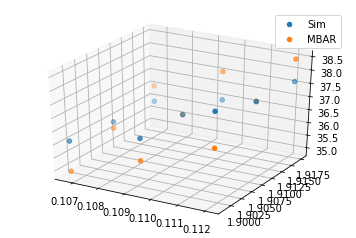

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_C_param_changes['epsilon values C']
Y = dfcomp_1fs_C_param_changes['rmin_half values C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_C_param_changes['Hvap_sim (kJ/mol)']
ZMBAR = dfcomp_1fs_C_param_changes['Hvap_expect (kJ/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

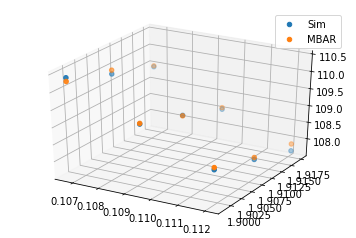

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_C_param_changes['epsilon values C']
Y = dfcomp_1fs_C_param_changes['rmin_half values C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_C_param_changes['Vol_sim (mL/mol)']
ZMBAR = dfcomp_1fs_C_param_changes['Vol_expect (mL/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

In [14]:
dfcomp_1fs_HC_param_changes = dfcomp_1fs[(dfcomp_1fs['rmin_half values C']==1.9080)&(dfcomp_1fs['epsilon values C']==0.1094)]
df2_1fs_HC_param_changes = df2_1fs[(df2_1fs['rmin_half_val_C']==1.9080)&(df2_1fs['eps_val_C']==0.1094)]

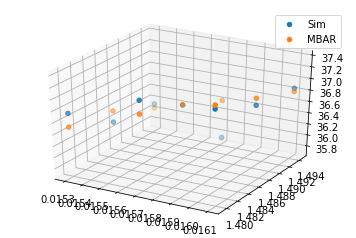

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_param_changes['epsilon values H-C']
Y = dfcomp_1fs_HC_param_changes['rmin_half values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_param_changes['Hvap_sim (kJ/mol)']
ZMBAR = dfcomp_1fs_HC_param_changes['Hvap_expect (kJ/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

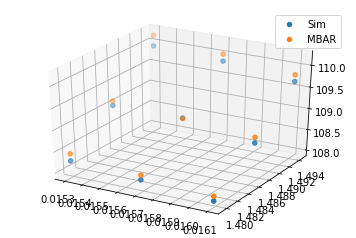

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_param_changes['epsilon values H-C']
Y = dfcomp_1fs_HC_param_changes['rmin_half values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_param_changes['Vol_sim (mL/mol)']
ZMBAR = dfcomp_1fs_HC_param_changes['Vol_expect (mL/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

In [17]:
dfcomp_1fs_HC_C_rmin_changes = dfcomp_1fs[(dfcomp_1fs['epsilon values H-C']==0.0157)&(dfcomp_1fs['epsilon values C']==0.1094)]
df2_1fs_HC_C_rmin_changes = df2_1fs[(df2_1fs['eps_val_H-C']==0.0157)&(df2_1fs['eps_val_C']==0.1094)]

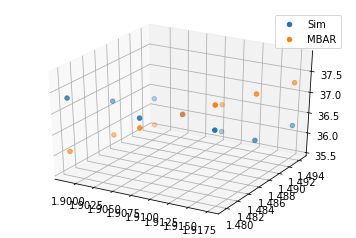

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_C_rmin_changes['rmin_half values C']
Y = dfcomp_1fs_HC_C_rmin_changes['rmin_half values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_C_rmin_changes['Hvap_sim (kJ/mol)']
ZMBAR = dfcomp_1fs_HC_C_rmin_changes['Hvap_expect (kJ/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

<IPython.core.display.Javascript object>


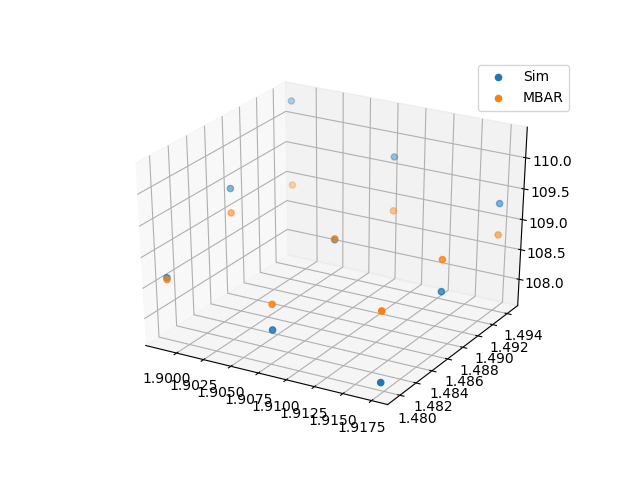

In [278]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_C_rmin_changes['rmin_half values C']
Y = dfcomp_1fs_HC_C_rmin_changes['rmin_half values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_C_rmin_changes['Vol_sim (mL/mol)']
ZMBAR = dfcomp_1fs_HC_C_rmin_changes['Vol_expect (mL/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

In [19]:
dfcomp_1fs_HC_C_eps_changes = dfcomp_1fs[(dfcomp_1fs['rmin_half values H-C']==1.4870)&(dfcomp_1fs['rmin_half values C']==1.9080)]
df2_1fs_HC_C_eps_changes = df2_1fs[(df2_1fs['rmin_half_val_H-C']==1.4870)&(df2_1fs['rmin_half_val_C']==1.9080)]

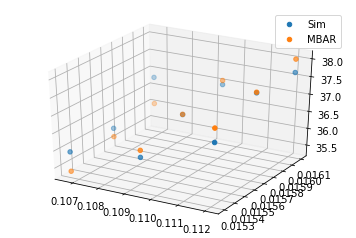

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_C_eps_changes['epsilon values C']
Y = dfcomp_1fs_HC_C_eps_changes['epsilon values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_C_eps_changes['Hvap_sim (kJ/mol)']
ZMBAR = dfcomp_1fs_HC_C_eps_changes['Hvap_expect (kJ/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

<IPython.core.display.Javascript object>


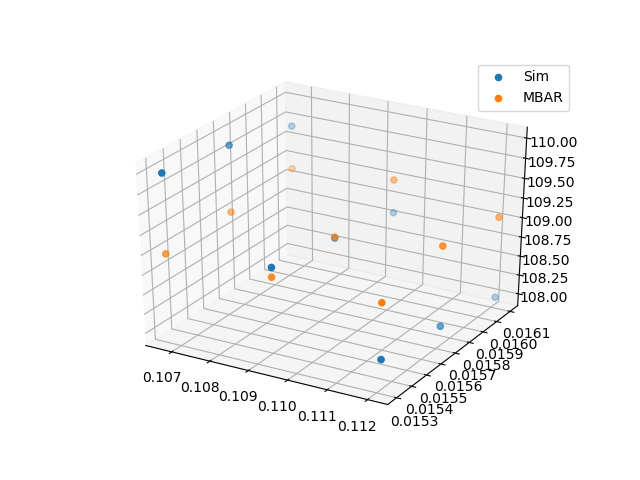

In [229]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs_HC_C_eps_changes['epsilon values C']
Y = dfcomp_1fs_HC_C_eps_changes['epsilon values H-C']

#ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs_HC_C_eps_changes['Vol_sim (mL/mol)']
ZMBAR = dfcomp_1fs_HC_C_eps_changes['Vol_expect (mL/mol)']

#ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

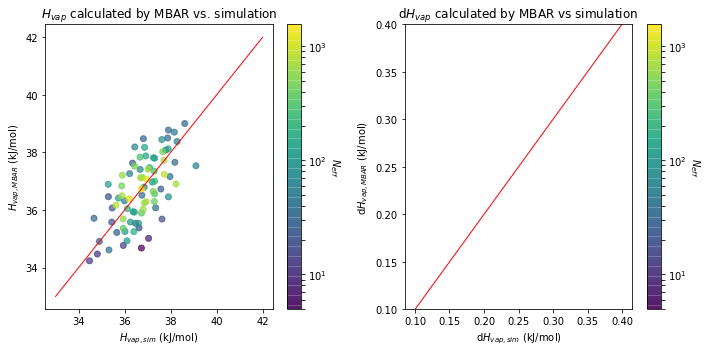

In [7]:
# Going to make a series of parity plots to see how the MBAR and simulation estimates compare
error_kwargs = {"lw":.4, "zorder":0}

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_expect (kJ/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7)
#plt.errorbar(df2_1fs['Hvap_sim (kJ/mol)'],dfcomp_1fs['Hvap_expect (kJ/mol)'],xerr=df2_1fs['dHvap_sim (kJ/mol)'],yerr=dfcomp_1fs['dHvap_expect (kJ/mol)'],fmt=None, marker=None, mew=0,**error_kwargs)
plt.plot([33,42],[33,42],color='red',label='Parity',linewidth=1)
#plt.xlim([33,42])
#plt.ylim([33,42])
plt.xlabel('$H_{vap,sim}$ (kJ/mol)')
plt.ylabel('$H_{vap,MBAR}$ (kJ/mol)')
plt.title('$H_{vap}$ calculated by MBAR vs. simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.subplot(1,2,2)
plt.scatter(df2_1fs['dHvap_sim (kJ/mol)'],dfcomp_1fs['dHvap_expect (kJ/mol)']*np.sqrt(dfcomp_1fs['N_eff']),c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7,)
plt.plot([0.1,0.4],[0.1,0.4],color='red',label='Parity',linewidth=1)
#plt.xlim([0.1,0.4])
plt.ylim([0.1,0.4])
plt.xlabel('d$H_{vap,sim}$ (kJ/mol)')
plt.ylabel('d$H_{vap,MBAR}$ (kJ/mol)')
plt.title('d$H_{vap}$ calculated by MBAR vs simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.tight_layout()

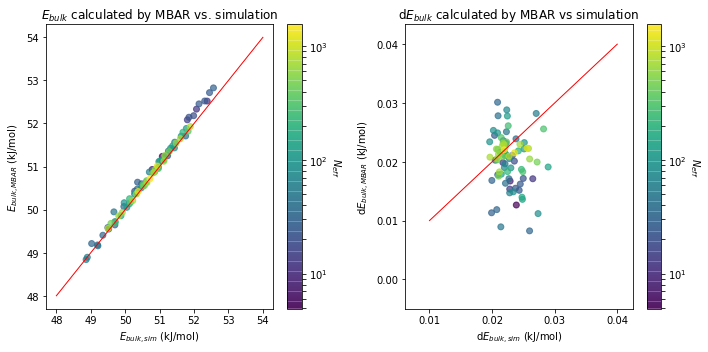

In [8]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(df2_1fs['E_bulk_sim (kJ/mol)'],dfcomp_1fs['E_expect (kJ/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7)
#plt.errorbar(df2_1fs['E_bulk_sim (kJ/mol)'],dfcomp_1fs['E_expect (kJ/mol)'],xerr=df2_1fs['dE_bulk_sim (kJ/mol)'],yerr=dfcomp_1fs['dE_expect (kJ/mol)'],fmt=None, marker=None, mew=0,**error_kwargs)
plt.plot([48,54],[48,54],color='red',label='Parity',linewidth=1)
#plt.xlim([48,54])
#plt.ylim([48,54])
plt.xlabel('$E_{bulk,sim}$ (kJ/mol)')
plt.ylabel('$E_{bulk,MBAR}$ (kJ/mol)')
plt.title('$E_{bulk}$ calculated by MBAR vs. simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.subplot(1,2,2)
plt.scatter(df2_1fs['dE_bulk_sim_dir (kJ/mol)'],dfcomp_1fs['dE_expect (kJ/mol)']*np.sqrt(dfcomp_1fs['N_eff']/1556.),c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7,)
plt.plot([0.01,0.04],[0.01,0.04],color='red',label='Parity',linewidth=1)
#plt.xlim([0.01,0.04])
#plt.ylim([0.01,0.04])
plt.xlabel('d$E_{bulk,sim}$ (kJ/mol)')
plt.ylabel('d$E_{bulk,MBAR}$ (kJ/mol)')
plt.title('d$E_{bulk}$ calculated by MBAR vs simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.tight_layout()

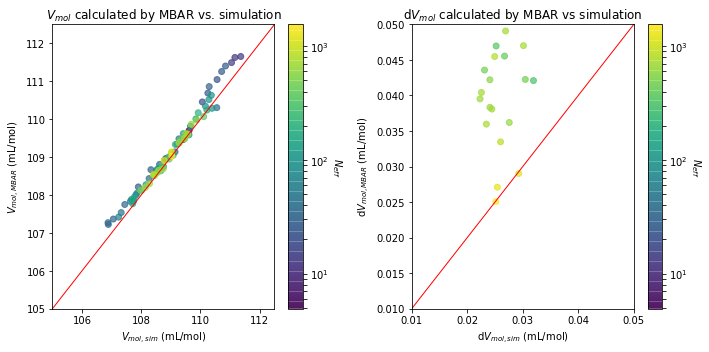

In [9]:
fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
plt.scatter(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_expect (mL/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),label='MBAR vs Sim',alpha=0.7)
#plt.errorbar(df2_1fs['Vol_sim (mL/mol)'],dfcomp_1fs['Vol_expect (mL/mol)'],xerr=df2_1fs['dVol_sim (mL/mol)'],yerr=dfcomp_1fs['dVol_expect (mL/mol)'],label='error bars',fmt=None, marker=None, mew=0,**error_kwargs)
plt.plot([105,112.5],[105,112.5],color='red',label='Parity',linewidth=1)
plt.xlim([105,112.5])
plt.ylim([105,112.5])
plt.xlabel('$V_{mol,sim}$ (mL/mol)')
plt.ylabel('$V_{mol,MBAR}$ (mL/mol)')
plt.title('$V_{mol}$ calculated by MBAR vs. simulation')
cbar = plt.colorbar() 
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.subplot(1,2,2)
plt.scatter(df2_1fs['dVol_sim (mL/mol)'],dfcomp_1fs['dVol_expect (mL/mol)'],c=dfcomp_1fs['N_eff'],cmap='viridis',norm=LogNorm(),alpha=0.7)
plt.plot([0.01,0.05],[0.01,0.05],color='red',label='Parity',linewidth=1)
plt.xlim([0.01,0.05])
plt.ylim([0.01,0.05])
plt.xlabel('d$V_{mol,sim}$ (mL/mol)')
plt.ylabel('d$V_{mol,MBAR}$ (mL/mol)')
plt.title('d$V_{mol}$ calculated by MBAR vs simulation')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('$N_{eff}$', rotation=270)

plt.tight_layout()

In [61]:
# Let's make the GP regressions! Making them for both observables and their uncertainty (both from MBAR), 
# so that I can include model error in the sampling.


In [51]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

Y_vol[:,0] = dfcomp_1fs['Vol_expect (mL/mol)']
dY_vol[:,0] = dfcomp_1fs['dVol_expect (mL/mol)']

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_vol = GPy.models.GPHeteroscedasticRegression(X,Y_vol,ker)#,dY_vol)
m_vol['.*het_Gauss.variance'] = abs(dY_vol)[:] #Set the noise parameters to the error in Y
m_vol.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_vol.optimize_restarts(num_restarts = 10)
#fig = m_vol.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")
#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of Molar Volume (mL/mol)")
#display(m_vol)

Optimization restart 1/10, f = 46.9750287535116
Optimization restart 2/10, f = 46.97502874932914
Optimization restart 3/10, f = 46.97502874900513
Optimization restart 4/10, f = 46.97502875535385
Optimization restart 5/10, f = 46.97502876332772


 C:\Users\Bryce\AppData\Local\conda\conda\envs\GPy_grad\lib\site-packages\gpy-1.6.2-py3.6-win-amd64.egg\GPy\kern\src\rbf.py:36: RuntimeWarning:overflow encountered in square


Optimization restart 6/10, f = 46.97502875108636
Optimization restart 7/10, f = 46.975028747235584
Optimization restart 8/10, f = 46.97502875569022
Optimization restart 9/10, f = 46.97502875961295
Optimization restart 10/10, f = 46.975028755922175


In [29]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

dY_vol[:,0] = dfcomp_1fs['dVol_expect (mL/mol)']

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_dvol = GPy.models.GPHeteroscedasticRegression(X,dY_vol,ker)#,dY_vol)

# optimize and plot
m_dvol.optimize_restarts(num_restarts = 10)
#fig = m_dvol.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")
#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of dV_mol (mL/mol)")
#display(m_dvol)

Optimization restart 1/10, f = -213.4047651357193
Optimization restart 2/10, f = -249.15749249513186
Optimization restart 3/10, f = -212.91603929896627
Optimization restart 4/10, f = -211.45921654918362
Optimization restart 5/10, f = -254.09168206963548
Optimization restart 6/10, f = -196.71066520003188
Optimization restart 7/10, f = -212.81882751140844
Optimization restart 8/10, f = -248.6022526743993
Optimization restart 9/10, f = -212.91870681316306
Optimization restart 10/10, f = -212.9187065734257


In [52]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

Y_hvap = dfcomp_1fs['Hvap_expect (kJ/mol)'][:,None]
dY_hvap = dfcomp_1fs['dHvap_expect (kJ/mol)'][:,None]

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_hvap = GPy.models.GPHeteroscedasticRegression(X,Y_hvap,ker)
m_hvap['.*het_Gauss.variance'] = abs(dY_hvap)[:] #Set the noise parameters to the error in Y
m_hvap.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_hvap.optimize_restarts(num_restarts = 10)
#fig = m_hvap.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")

#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of H_vap (kJ/mol)")
#display(m_hvap)

Optimization restart 1/10, f = 36.79897349383221
Optimization restart 2/10, f = 36.79897349374262
Optimization restart 3/10, f = 36.79897349376178
Optimization restart 4/10, f = 36.798973503046675
Optimization restart 5/10, f = 36.798973493770426
Optimization restart 6/10, f = 36.79897349375282
Optimization restart 7/10, f = 36.7989734976721
Optimization restart 8/10, f = 36.79897349442422
Optimization restart 9/10, f = 36.79897354386856
Optimization restart 10/10, f = 36.798973493721185


In [31]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

dY_hvap = dfcomp_1fs['dHvap_expect (kJ/mol)'][:,None]

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_dhvap = GPy.models.GPHeteroscedasticRegression(X,dY_hvap,ker)
#m_hvap['.*het_Gauss.variance'] = abs(dY_hvap)[:] #Set the noise parameters to the error in Y
#m_hvap.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_dhvap.optimize_restarts(num_restarts = 10)
#fig = m_dhvap.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")
#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of dH_vap (kJ/mol)")
#display(m_dhvap)

Optimization restart 1/10, f = -210.27590871049784
Optimization restart 2/10, f = -202.63354960359302
Optimization restart 3/10, f = -220.885719006603
Optimization restart 4/10, f = -217.30089586274687
Optimization restart 5/10, f = -203.44903061370664
Optimization restart 6/10, f = -199.64539773749772
Optimization restart 7/10, f = -199.11268740567778
Optimization restart 8/10, f = -202.63355144052932
Optimization restart 9/10, f = -198.76350306863915
Optimization restart 10/10, f = -198.2127365493754


In [53]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

Y_E = dfcomp_1fs['E_expect (kJ/mol)'][:,None]
dY_E = dfcomp_1fs['dE_expect (kJ/mol)'][:,None]

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_E = GPy.models.GPHeteroscedasticRegression(X,Y_E,ker)
m_E['.*het_Gauss.variance'] = abs(dY_E)[:] #Set the noise parameters to the error in Y
m_E.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_E.optimize_restarts(num_restarts = 10)
#fig = m_E.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")
#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of E_bulk (kJ/mol)")
#display(m_hvap)

Optimization restart 1/10, f = -16.227381366661213
Optimization restart 2/10, f = -16.22738136431188
Optimization restart 3/10, f = -16.227381362856526
Optimization restart 4/10, f = -16.227381365739916


 C:\Users\Bryce\AppData\Local\conda\conda\envs\GPy_grad\lib\site-packages\gpy-1.6.2-py3.6-win-amd64.egg\GPy\kern\src\rbf.py:36: RuntimeWarning:overflow encountered in square


Optimization restart 5/10, f = -16.22738136671608
Optimization restart 6/10, f = -16.22738136805866
Optimization restart 7/10, f = -16.227381362359075
Optimization restart 8/10, f = -16.227381359941994
Optimization restart 9/10, f = -16.22738136765252
Optimization restart 10/10, f = -16.227381367190496


In [34]:
# sample inputs and outputs
X = np.zeros([len(dfcomp_1fs['epsilon values C']),4],float)
Y_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
dY_vol = np.zeros([len(dfcomp_1fs['epsilon values C']),1],float)
X[:,1] = dfcomp_1fs['epsilon values C']
X[:,0] = dfcomp_1fs['rmin_half values C']
X[:,3] = dfcomp_1fs['epsilon values H-C']
X[:,2] = dfcomp_1fs['rmin_half values H-C']

dY_E = dfcomp_1fs['dE_expect (kJ/mol)'][:,None]

# define kernel
ker = GPy.kern.RBF(4)

# create simple GP model
m_dE = GPy.models.GPHeteroscedasticRegression(X,dY_E,ker)
#m_hvap['.*het_Gauss.variance'] = abs(dY_hvap)[:] #Set the noise parameters to the error in Y
#m_hvap.het_Gauss.variance.fix() #We can fix the noise term, since we already know it

# optimize and plot
m_dE.optimize_restarts(num_restarts = 10)
#fig = m_dE.plot(figsize=(10,5))
#plt.xlabel(r"$r_m / 2$")
#plt.ylabel(r"$\epsilon$")
#plt.title("GP Regression of dE_bulk (kJ/mol)")
display(m_dE)

Optimization restart 1/10, f = -155.50491505870238
Optimization restart 2/10, f = -155.41872352653286
Optimization restart 3/10, f = -155.52672038372677
Optimization restart 4/10, f = -157.58574984212805
Optimization restart 5/10, f = -157.58575370840177
Optimization restart 6/10, f = -155.50491500529748
Optimization restart 7/10, f = -157.2760399334058
Optimization restart 8/10, f = -157.58575414108523
Optimization restart 9/10, f = -160.00831449919357
Optimization restart 10/10, f = -155.52671901129062


gp.,value,constraints,priors
rbf.variance,0.08243162089428238,+ve,
rbf.lengthscale,0.29123965091264076,+ve,
het_Gauss.variance,"(81, 1)",+ve,


<IPython.core.display.Javascript object>


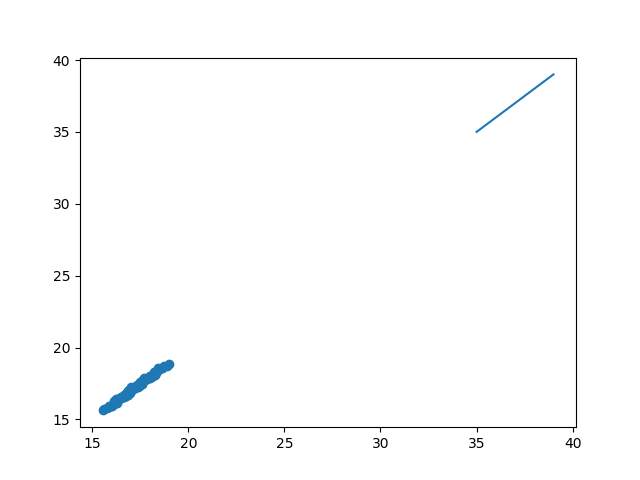

In [54]:
# How do the MBAR estimates and GP predictions compare?
Hvap_GP_ = m_hvap.predict(X, include_likelihood=False)
Vol_GP_ = m_vol.predict(X,include_likelihood=False)
dHvap_GP_ = m_dhvap.predict(X, include_likelihood=False)
dVol_GP_ = m_dvol.predict(X,include_likelihood=False)
E_GP_ = m_E.predict(X,include_likelihood=False)
dE_GP_ = m_dE.predict(X, include_likelihood=False)

Hvap_GP = []
Vol_GP = []
E_GP = []
dHvap_GP = []
dVol_GP = []
dE_GP = []

for i in Hvap_GP_[0]:
    Hvap_GP.append(i[0])
for i in Vol_GP_[0]:
    Vol_GP.append(i[0])
for i in E_GP_[0]:
    E_GP.append(i[0])
for i in dHvap_GP_[0]:
    dHvap_GP.append(i[0])
for i in dVol_GP_[0]:
    dVol_GP.append(i[0])
for i in dE_GP_[0]:
    dE_GP.append(i[0])    
        
dfcomp_1fs['Hvap_GP (kJ/mol)'] = Hvap_GP
dfcomp_1fs['dev_Hvap_expect_GP (kJ/mol)'] = dfcomp_1fs['Hvap_GP (kJ/mol)'] - dfcomp_1fs['Hvap_expect (kJ/mol)']
dfcomp_1fs['Vol_GP (mL/mol)'] = Vol_GP
dfcomp_1fs['dev_Vol_expect_GP (mL/mol)'] = dfcomp_1fs['Vol_GP (mL/mol)'] - dfcomp_1fs['Vol_expect (mL/mol)']
dfcomp_1fs['E_GP (kJ/mol)'] = E_GP
dfcomp_1fs['dev_E_expect_GP (kJ/mol)'] = dfcomp_1fs['E_GP (kJ/mol)'] - dfcomp_1fs['E_expect (kJ/mol)']
dfcomp_1fs['dHvap_GP (kJ/mol)'] = dHvap_GP
dfcomp_1fs['dVol_GP (mL/mol)'] = dVol_GP
dfcomp_1fs['dE_GP (kJ/mol)'] = dE_GP

plt.figure()
plt.scatter(dfcomp_1fs['Hvap_expect (kJ/mol)'],dfcomp_1fs['Hvap_GP (kJ/mol)'])
plt.plot([35,39],[35,39])


In [56]:
X_test = np.zeros([1,4],float)
X_test[0,:] = [1.908 , 0.1094, 1.487 , 0.0157]
m_vol.predict(X_test,include_likelihood=False)[1][0][0]

0.0010467151587363333

<IPython.core.display.Javascript object>


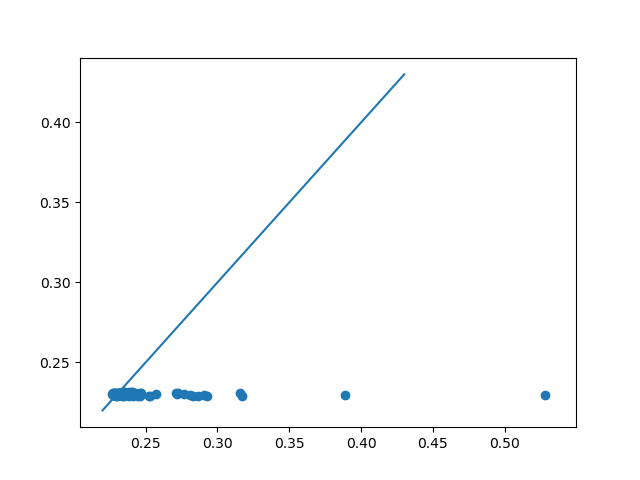

In [40]:
plt.figure()
plt.scatter(dfcomp_1fs['dHvap_expect (kJ/mol)'],dfcomp_1fs['dHvap_GP (kJ/mol)'])
plt.plot([0.22,0.43],[0.22,0.43])



<IPython.core.display.Javascript object>


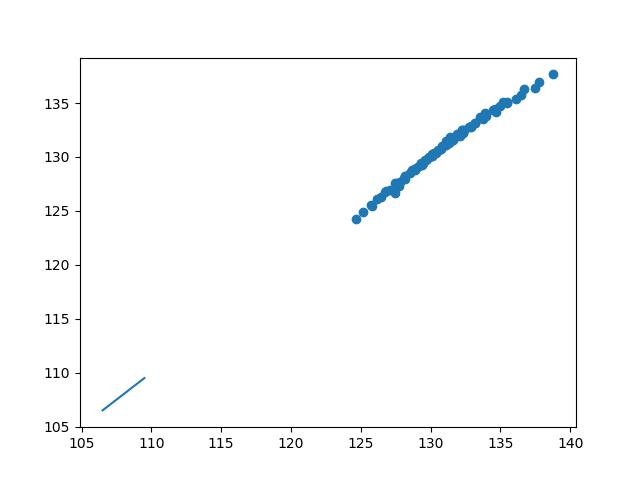

In [55]:
plt.figure()
plt.scatter(dfcomp_1fs['Vol_expect (mL/mol)'],dfcomp_1fs['Vol_GP (mL/mol)'])
plt.plot([106.5,109.5],[106.5,109.5])



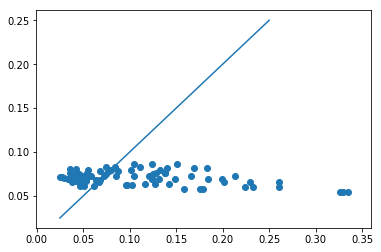

In [23]:
plt.figure()
plt.scatter(dfcomp_1fs['dVol_expect (mL/mol)'],dfcomp_1fs['dVol_GP (mL/mol)'])
plt.plot([0.025,0.25],[0.025,0.25])

<IPython.core.display.Javascript object>


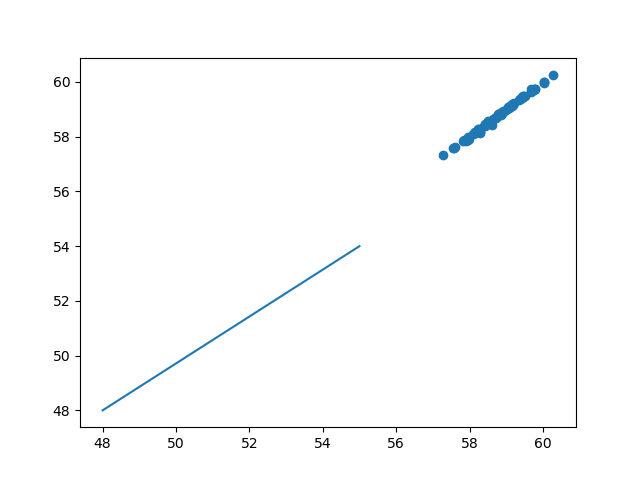

In [56]:
plt.figure()
plt.scatter(dfcomp_1fs['E_expect (kJ/mol)'],dfcomp_1fs['E_GP (kJ/mol)'])
plt.plot([48,55],[48,54])

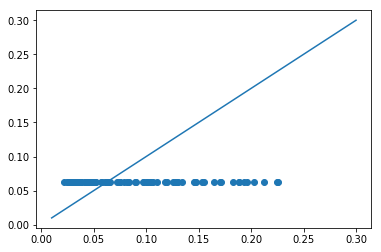

In [25]:
plt.figure()
plt.scatter(dfcomp_1fs['dE_expect (kJ/mol)'],dfcomp_1fs['dE_GP (kJ/mol)'])
plt.plot([0.01,0.3],[0.01,0.3])

In [47]:
# Well enough for demonstration 

In [48]:
# Let's also plot some 3D scatters of Hvap and Volume over parameters to make sure nothing wild is happening

In [48]:
from mpl_toolkits import mplot3d
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


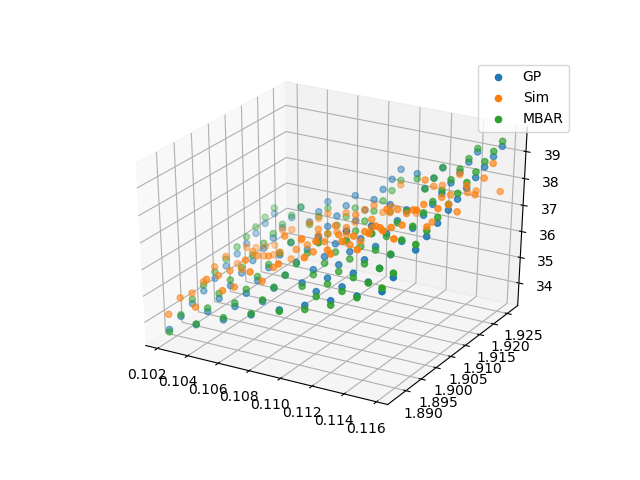

In [49]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs['epsilon values']
Y = dfcomp_1fs['rmin_half values']

ZGP = dfcomp_1fs['Hvap_GP (kJ/mol)']
Z = df2_1fs['Hvap_sim (kJ/mol)']
ZMBAR = dfcomp_1fs['Hvap_expect (kJ/mol)']

ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

<IPython.core.display.Javascript object>


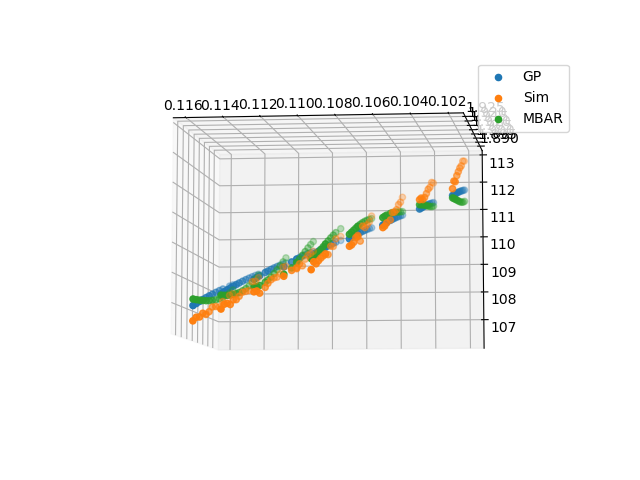

In [268]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs['epsilon values']
Y = dfcomp_1fs['rmin_half values']

ZGP = dfcomp_1fs['Vol_GP (mL/mol)']
Z = df2_1fs['Vol_sim (mL/mol)']
ZMBAR = dfcomp_1fs['Vol_expect (mL/mol)']

ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

<IPython.core.display.Javascript object>


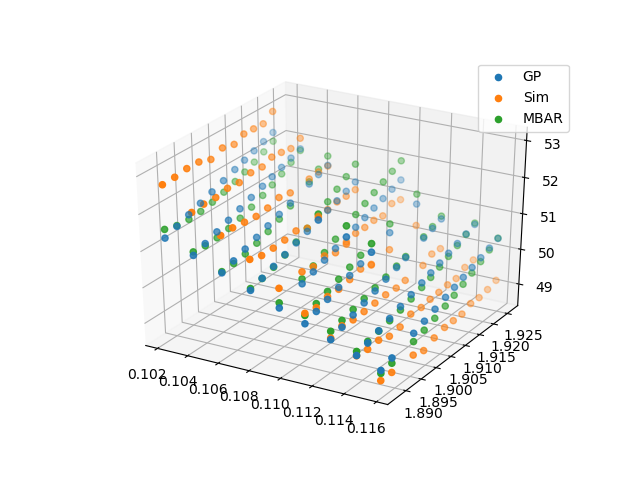

In [50]:
fig = plt.figure()
ax = plt.axes(projection='3d')

X = dfcomp_1fs['epsilon values']
Y = dfcomp_1fs['rmin_half values']

ZGP = dfcomp_1fs['E_GP (kJ/mol)']
Z = df2_1fs['E_bulk_sim (kJ/mol)']
ZMBAR = dfcomp_1fs['E_expect (kJ/mol)']

ax.scatter3D(X, Y, ZGP, label='GP')
ax.scatter3D(X, Y, Z, label='Sim')
ax.scatter3D(X, Y, ZMBAR, label='MBAR')
plt.legend()

### How do we move away from this fixed grid of MBAR estimates

In [112]:
# Finally we'll use the GPs to sample from our posterior!

In [57]:
def Vol(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    v = float(m_vol.predict(X_,include_likelihood=False)[0][0][0])
    dv = float(m_vol.predict(X_,include_likelihood=False)[1][0][0])
    return v, dv

def Hvap(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    hvap = float(m_hvap.predict(X_,include_likelihood=False)[0][0][0])
    dhvap = float(m_hvap.predict(X_,include_likelihood=False)[1][0][0])
    return hvap, dhvap

def Ebulk(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    h = float(m_E.predict(X_,include_likelihood=False)[0][0][0])
    dh = float(m_E.predict(X_,include_likelihood=False)[1][0][0])
    return h, dh
"""
def dVol(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    return float(m_dvol.predict(X_,include_likelihood=False)[0][0][0])

def dHvap(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    return float(m_dhvap.predict(X_,include_likelihood=False)[0][0][0])

def dEbulk(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):
    X_ = np.zeros([1,4],float)
    X_[:,1] = eps_C_
    X_[:,0] = rmin_half_C_
    X_[:,3] = eps_HC_
    X_[:,2] = rmin_half_HC_
    return float(m_dE.predict(X_,include_likelihood=False)[0][0][0])
"""


'\ndef dVol(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):\n    X_ = np.zeros([1,4],float)\n    X_[:,1] = eps_C_\n    X_[:,0] = rmin_half_C_\n    X_[:,3] = eps_HC_\n    X_[:,2] = rmin_half_HC_\n    return float(m_dvol.predict(X_,include_likelihood=False)[0][0][0])\n\ndef dHvap(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):\n    X_ = np.zeros([1,4],float)\n    X_[:,1] = eps_C_\n    X_[:,0] = rmin_half_C_\n    X_[:,3] = eps_HC_\n    X_[:,2] = rmin_half_HC_\n    return float(m_dhvap.predict(X_,include_likelihood=False)[0][0][0])\n\ndef dEbulk(eps_C_,rmin_half_C_,eps_HC_,rmin_half_HC_):\n    X_ = np.zeros([1,4],float)\n    X_[:,1] = eps_C_\n    X_[:,0] = rmin_half_C_\n    X_[:,3] = eps_HC_\n    X_[:,2] = rmin_half_HC_\n    return float(m_dE.predict(X_,include_likelihood=False)[0][0][0])\n'

In [58]:
# Data from ThermoML
y_ = pd.DataFrame({'Vol (mL/mol)':[108.96590066460662],'Hvap (kJ/mol)':[36.722076291717876],'H (kJ/mol)':[33.349]})
yerr_= pd.DataFrame({'Vol_std (mL/mol)':[0.012519370643216335],'Hvap_std (kJ/mol)':[0.11362047485303076],'H_std (kJ/mol)':[0.33349]})

In [59]:
# Define our probability models

def lnlike(theta, y, yerr):
    eps_C,rmin_half_C,eps_HC,rmin_half_HC = theta
    V_model,dV_model = Vol(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    Hvap_model,dHvap_model = Hvap(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    H_model,dH_model = Ebulk(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    #dV_model = dVol(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    #dHvap_model = dHvap(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    #dH_model = dEbulk(eps_C,rmin_half_C,eps_HC,rmin_half_HC)
    #print(theta)
    #print(V_model,Hvap_model,dV_model,dHvap_model)
    return -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['Vol_std (mL/mol)'].item() + dV_model)**2) - (1./(2.*(yerr['Vol_std (mL/mol)'].item() + dV_model)**2))*(y['Vol (mL/mol)'].item()-V_model)**2 + -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['Hvap_std (kJ/mol)'].item() + dHvap_model)**2) - (1./(2.*(yerr['Hvap_std (kJ/mol)'].item() + dHvap_model)**2))*(y['Hvap (kJ/mol)'].item() - Hvap_model)**2
    #return -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['Vol_std (mL/mol)'].item())**2) - (1./(2.*(yerr['Vol_std (mL/mol)'].item())**2))*(y['Vol (mL/mol)'].item()-V_model)**2 + -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['Hvap_std (kJ/mol)'].item())**2) - (1./(2.*(yerr['Hvap_std (kJ/mol)'].item())**2))*(y['Hvap (kJ/mol)'].item() - Hvap_model)**2
    #return -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['Vol_std (mL/mol)'].item() + dV_model)**2) - (1./(2.*(yerr['Vol_std (mL/mol)'].item() + dV_model)**2))*(y['Vol (mL/mol)'].item()-V_model)**2 + -(1./2.)*np.log(2.*np.pi) - (1./2.)*np.log((yerr['H_std (kJ/mol)'].item() + dH_model)**2) - (1./(2.*(yerr['H_std (kJ/mol)'].item() + dH_model)**2))*(y['H (kJ/mol)'].item() - H_model)**2 
# TODO: Incorporate model error into likelihood calculation ---> check. done.

def lnprior(theta):
    eps_C,rmin_half_C,eps_HC,rmin_half_HC = theta
    if 0.05 < eps_C < 0.2 and 1.5 < rmin_half_C < 2.5 and 0.0001 < eps_HC < 0.06 and 1.2 < rmin_half_HC < 1.7:
    #if np.min(dfcomp_1fs['epsilon values']) < eps < np.max(dfcomp_1fs['epsilon values']) and np.min(dfcomp_1fs['rmin_half values']) < rmin_half < np.max(dfcomp_1fs['rmin_half values']):
        return 0.0
    return -np.inf

def lnprob(theta, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, y, yerr)

In [62]:
ndim, nwalkers = 4, 1000
pos0 = [np.array([0.08205,1.8126,0.011775,1.41265]) + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
# Optimizing the walker positions? I did something pretty arbitrary.
#[0.1,2.2,0.006,1.55]
import emcee
import sys

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(y_, yerr_),live_dangerously=True)

#burnin steps
print("Begin burnin")
%time pos, prob, state = sampler.run_mcmc(pos0, 1000)
sampler.reset()

#Production steps
print("Begin production")
%time sampler.run_mcmc(pos, 5000)

Begin burnin
Wall time: 23min 2s
Begin production
Wall time: 1h 41min 59s


(array([[0.06488181, 1.74098567, 0.04036039, 1.4288603 ],
        [0.13093208, 1.76948301, 0.02688124, 1.48208457],
        [0.08514956, 1.74032676, 0.0084784 , 1.30643575],
        ...,
        [0.05485514, 1.60654672, 0.01978166, 1.40358691],
        [0.09683886, 1.73284235, 0.02210454, 1.38431975],
        [0.10159076, 1.88972122, 0.02486117, 1.40994121]]),
 array([ -9.82239434, -10.4518519 , -11.86684935, -11.76012088,
         -8.84969962, -11.36727952, -11.50896065,  -9.7438086 ,
         -8.28065496, -12.29497383,  -9.18544877,  -8.54562233,
         -8.66051731,  -7.92752898,  -9.70174169,  -8.70717172,
         -8.23279564,  -9.52358994, -10.28469424,  -8.03218557,
        -10.00265865,  -8.07150945, -11.48012098,  -9.69656442,
        -10.20525884, -12.04747379,  -8.7205983 , -12.25490478,
        -12.70046933, -10.7272297 ,  -8.766109  , -11.91982156,
         -8.14681687,  -9.34052737,  -9.47461585,  -8.51930647,
        -10.79691712,  -8.24902391,  -9.52188343, -12.3609008

In [45]:
theta = [0.10942417, 1.90808001, 0.01580782, 1.48696926]
Vol(theta[1],theta[0],theta[3],theta[2])

2.112489242999345

In [49]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


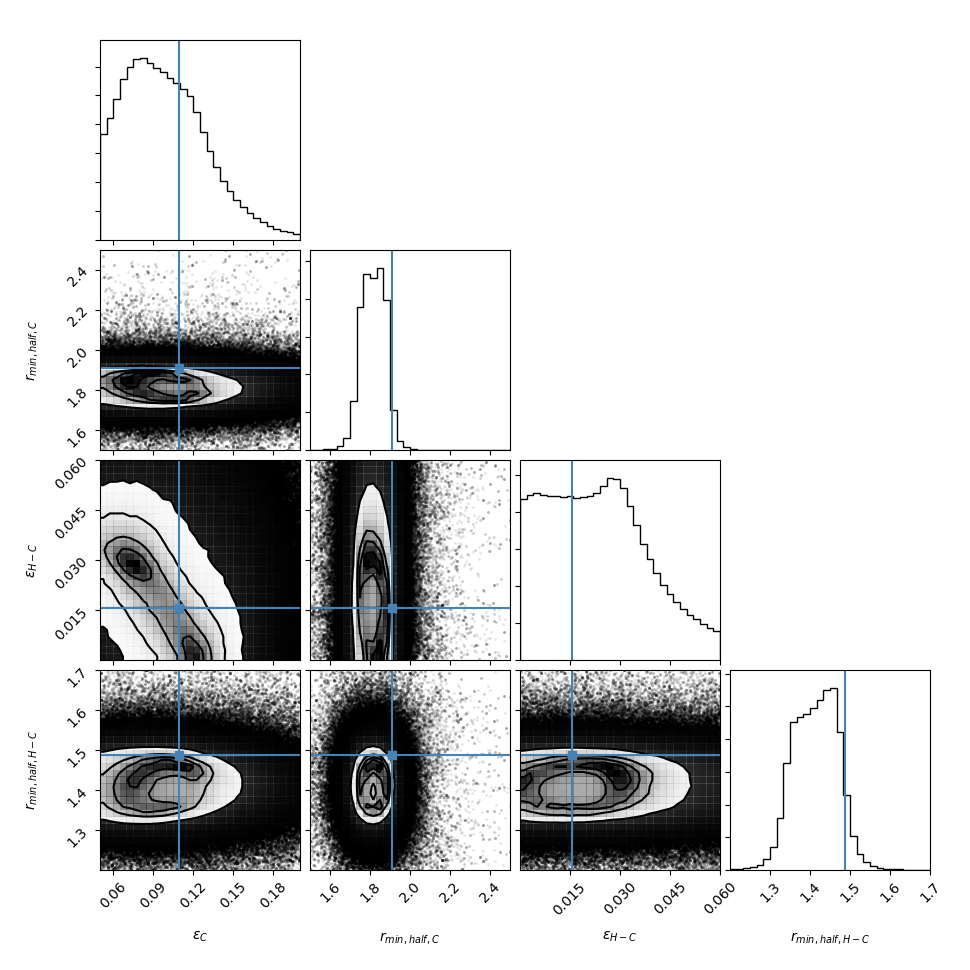

In [63]:
# Let's plot our posterior!
samples = sampler.chain[:, :, :].reshape((-1, ndim))

import corner
fig = corner.corner(samples, bins=30, labels=["$\epsilon_{C}$", "$r_{min,half,C}$", "$\epsilon_{H-C}$", "$r_{min,half,H-C}$"],
                      truths=[0.1094,1.908,0.0157,1.487],plot_density=True)

In [76]:
sampler.acceptance_fraction

array([0.4165, 0.4125, 0.3965, 0.4345, 0.441 , 0.412 , 0.3795, 0.3785,
       0.406 , 0.4215, 0.3785, 0.4335, 0.429 , 0.3895, 0.39  , 0.4325,
       0.4105, 0.407 , 0.415 , 0.439 , 0.3935, 0.422 , 0.41  , 0.4425,
       0.4225, 0.3985, 0.3985, 0.469 , 0.3895, 0.3915, 0.4035, 0.422 ,
       0.3635, 0.4195, 0.4345, 0.416 , 0.417 , 0.3905, 0.409 , 0.4315,
       0.4205, 0.4155, 0.4365, 0.414 , 0.391 , 0.4115, 0.4095, 0.4055,
       0.389 , 0.403 , 0.4175, 0.413 , 0.417 , 0.4155, 0.4205, 0.4275,
       0.421 , 0.3965, 0.423 , 0.437 , 0.375 , 0.3935, 0.3965, 0.4355,
       0.3705, 0.3995, 0.428 , 0.3965, 0.395 , 0.3675, 0.408 , 0.3675,
       0.3975, 0.41  , 0.4195, 0.43  , 0.394 , 0.4265, 0.429 , 0.4315,
       0.4145, 0.411 , 0.4075, 0.429 , 0.4195, 0.423 , 0.3825, 0.4225,
       0.4   , 0.4085, 0.4015, 0.4   , 0.412 , 0.396 , 0.4045, 0.3875,
       0.4185, 0.4215, 0.4195, 0.418 , 0.4205, 0.453 , 0.3955, 0.3735,
       0.43  , 0.417 , 0.4325, 0.415 , 0.4   , 0.402 , 0.432 , 0.4245,
      

<IPython.core.display.Javascript object>


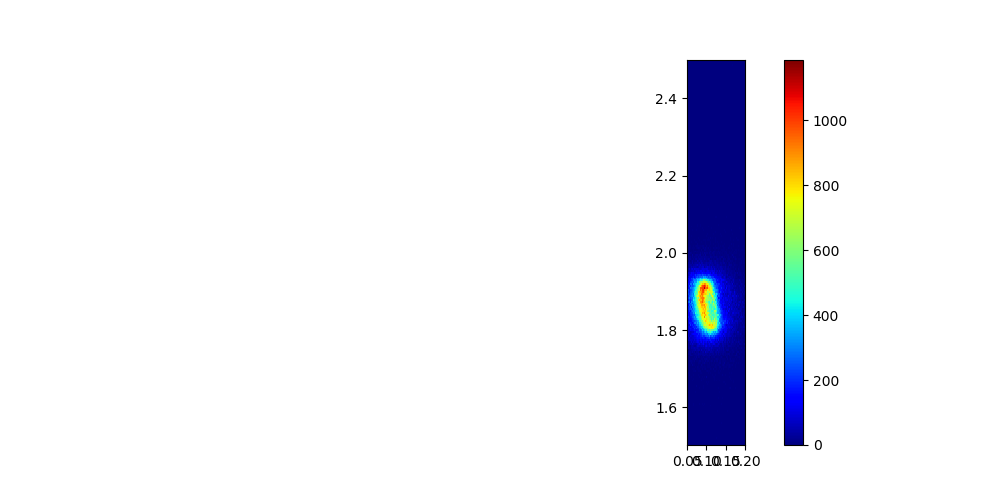

61 81
0.09574995101007666 1.9059883856129543


In [51]:
# Now let's find the maximum
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from os import getcwd
from os.path import join, realpath, dirname

# Path to dir where this code exists.
samples = sampler.flatchain

eps = samples[:,0]
rmin = samples[:,1]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

epsmin, epsmax = min(eps), max(eps)
rminmin, rminmax = min(rmin), max(rmin)
rang = [[epsmin, epsmax], [rminmin, rminmax]]

binsxy = [((epsmax - epsmin) / 20.), ((rminmax - rminmin) / 20.)]

H, xedges, yedges = np.histogram2d(eps, rmin, range=rang, bins=200)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
cp = ax.imshow(H.transpose()[::-1], interpolation='nearest', extent=extent, cmap=cm.jet)
fig.colorbar(cp)

plt.show()

x_cent, y_cent = np.unravel_index(H.argmax(), H.shape)
print(x_cent, y_cent)
print(xedges[x_cent], yedges[y_cent]) # maximum # Confidence interval? Multidimensional space (volume fraction)?

In [ ]:
#LAST Set of Optima:

#Markov chain 1: 0.123169898921 1.80998708165
#Markov chain 2: 0.0638828882656 1.87999008368

#LowHigh: 0.123056669259 1.82907156612
#HighHigh: 0.124483041163 1.90601304086